# Data Preprocessing - Parte 2 (Distribuzioni)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data(file_path):
    """Load data from a CSV file into a pandas DataFrame."""
    try:
        data = pd.read_csv(file_path, sep=',')
        print("Data loaded successfully.")
        return data
    except Exception as e:
        print(f"An error occurred while loading the data: {e}")
        return None

def summarize_data(data):
    """Generate summary statistics of the DataFrame."""
    if data is not None:
        summary = data.describe()
        print("Data summary:")
        print(summary)
        return summary
    else:
        print("No data to summarize.")
        return None

In [3]:
data = load_data("../data_section_2/wfp_food_prices_afg.csv")
summary = summarize_data(data)

Data loaded successfully.
Data summary:
          market_id      latitude     longitude  commodity_id         price  \
count  39467.000000  39467.000000  39467.000000  39467.000000  3.946700e+04   
mean    2365.613956     34.504511     67.409038    230.030177  9.136965e+03   
std     1427.426775      1.636160      2.612715    180.060649  1.396229e+05   
min      266.000000     30.800000     62.200000     55.000000  2.770000e+00   
25%      273.000000     33.630000     65.710000     84.000000  3.330000e+01   
50%     3227.000000     34.520000     67.820000    178.000000  6.226000e+01   
75%     3238.000000     35.800000     69.620000    284.000000  1.050350e+02   
max     3695.000000     37.120000     71.090000    800.000000  5.833333e+06   

            usdprice  
count   39467.000000  
mean      191.342862  
std      2939.813455  
min         0.058000  
25%         0.460000  
50%         0.830000  
75%         1.370000  
max    122807.010000  


In [4]:
data.head()

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,2000-01-15,Badakhshan,Faiz Abad,Fayzabad,266,37.12,70.58,non-food,"Wage (non-qualified labour, non-agricultural)",465,Day,actual,Retail,AFN,150000.00,3205.81
1,2000-01-15,Balkh,Mazar-e-Sharif,Mazar,267,36.73,67.11,non-food,"Wage (non-qualified labour, non-agricultural)",465,Day,actual,Retail,AFN,100000.00,2137.21
2,2000-01-15,Hirat,Hirat,Hirat,270,34.35,62.20,cereals and tubers,Bread,55,KG,actual,Retail,AFN,15.63,0.33
3,2000-01-15,Hirat,Hirat,Hirat,270,34.35,62.20,cereals and tubers,Wheat,84,KG,actual,Retail,AFN,9.13,0.20
4,2000-01-15,Hirat,Hirat,Hirat,270,34.35,62.20,cereals and tubers,Wheat flour,58,KG,actual,Retail,AFN,10.06,0.22


In [5]:
# mean usdprice for commodity == 'Wage (non-qualified labour, non-agricultural)' in the year 2000 vs 2020
mean_2000 = data[(data['commodity'] == 'Wage (non-qualified labour, non-agricultural)') & (data['year'] == 2000)]['usdprice'].mean()
mean_2020 = data[(data['commodity'] == 'Wage (non-qualified labour, non-agricultural)') & (data['year'] == 2020)]['usdprice'].mean()    
print(f"Mean USD price for 'Wage (non-qualified labour, non-agricultural)' in 2000: {mean_2000}")
print(f"Mean USD price for 'Wage (non-qualified labour, non-agricultural)' in 2020: {mean_2020}")

KeyError: 'year'

In [5]:
data['category'].value_counts()

category
cereals and tubers     18255
non-food               11913
miscellaneous food      4556
oil and fats            2278
pulses and nuts         2278
meat, fish and eggs      187
Name: count, dtype: int64

In [7]:
# Adding a column called year extracting the year from the date column
data['year'] = pd.to_datetime(data['date']).dt.year
data.head()

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice,year
0,2000-01-15,Badakhshan,Faiz Abad,Fayzabad,266,37.12,70.58,non-food,"Wage (non-qualified labour, non-agricultural)",465,Day,actual,Retail,AFN,150000.00,3205.81,2000
1,2000-01-15,Balkh,Mazar-e-Sharif,Mazar,267,36.73,67.11,non-food,"Wage (non-qualified labour, non-agricultural)",465,Day,actual,Retail,AFN,100000.00,2137.21,2000
2,2000-01-15,Hirat,Hirat,Hirat,270,34.35,62.20,cereals and tubers,Bread,55,KG,actual,Retail,AFN,15.63,0.33,2000
3,2000-01-15,Hirat,Hirat,Hirat,270,34.35,62.20,cereals and tubers,Wheat,84,KG,actual,Retail,AFN,9.13,0.20,2000
4,2000-01-15,Hirat,Hirat,Hirat,270,34.35,62.20,cereals and tubers,Wheat flour,58,KG,actual,Retail,AFN,10.06,0.22,2000


In [8]:
data['year'].value_counts().sort_index()

year
2000     302
2001     322
2002     333
2003     219
2004     258
2005     172
2006     173
2007     291
2008     288
2009     287
2010     287
2011     252
2012     265
2013     245
2014     527
2015     678
2016     689
2017     688
2018     688
2019     671
2020    4001
2021    5684
2022    5663
2023    5661
2024    5660
2025    5163
Name: count, dtype: int64

In [9]:
# dropping the rows with year == 2025
data = data[data['year'] != 2025]

In [10]:
data['year-bin'] = data['year'] // 5 * 5

C:\Users\HEW14SDQ1006NL\AppData\Local\Temp\ipykernel_15656\3326056458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year-bin'] = data['year'] // 5 * 5


In [13]:
# Vorrei ottenere un dataframe in cui le colonne sono le categorie e le righe le date. In ogni cella ci sarà il prezzo in afghani e in usd.
# index non è chiave e quindi non dovrebbe aggregare
#df_wide = data.pivot_table(index='date', columns='category', values=['price', 'usdprice'])
#df_wide.head()


In [11]:
# Un'alternativa è fare una pivot table per ogni anno con date come index e categorie come colonne e poi fare stacking
df_wide = pd.DataFrame()

for year in data['year'].unique():
    df_year = data[data['year'] == year]
    #df_pivot = df_year.pivot_table(index='date', columns='commodity', values=['price', 'usdprice'], aggfunc='mean')
    df_pivot = df_year.pivot_table(index='date', columns='commodity', values='usdprice', aggfunc='mean')
    df_wide = pd.concat([df_wide, df_pivot])
df_wide.head()

df_wide['year'] = pd.to_datetime(df_wide.index).year
df_wide.head()

commodity,Bread,Fuel (diesel),"Livestock (sheep, one-year-old alive female)","Wage (non-qualified labour, non-agricultural)",Wheat,Wheat flour,Rice (low quality),Exchange rate,Wage (qualified labour),Oil (cooking),Pulses,Rice (high quality),Salt,Sugar,Wheat flour (high quality),Wheat flour (low quality),year
date,,,,,,,,,,,,,,,,,
2000-01-15,0.325000,NaN,NaN,1776.553333,0.2625,0.3325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000
2000-02-15,0.305000,NaN,NaN,1807.015000,0.2475,0.3025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000
2000-03-15,0.303333,530.926000,NaN,1747.130000,0.2325,0.2775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000
2000-04-15,0.343333,470.231667,NaN,1856.161667,0.2800,0.3225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000
2000-05-15,0.350000,482.731667,25700.028333,1886.725000,0.2675,0.3025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000


In [12]:
# dropping the column "Livestock (sheep, one-year-old alive female)"
df_wide = df_wide.drop(columns=['Livestock (sheep, one-year-old alive female)'])

In [15]:
# keeping years since 2005
df_wide = df_wide[df_wide['year'] >= 2015]

In [13]:
# dropping exchange rate column
df_wide = df_wide.drop(columns=['Exchange rate'])

In [ ]:
#df_wide.to_csv('../data_section_2/wfp_food_prices_afg_wide_usd_small.csv')

<Axes: >

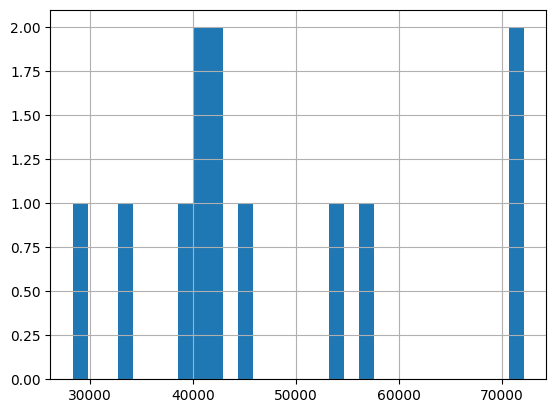

In [ ]:
df_choice = df_wide[df_wide['year'] == 2002]
#df_choice['Livestock (sheep, one-year-old alive female)'].hist(bins=30) dropped

# kde plot
#df_choice['Livestock (sheep, one-year-old alive female)'].plot.kde()
#df_choice['Bread'].plot.kde()


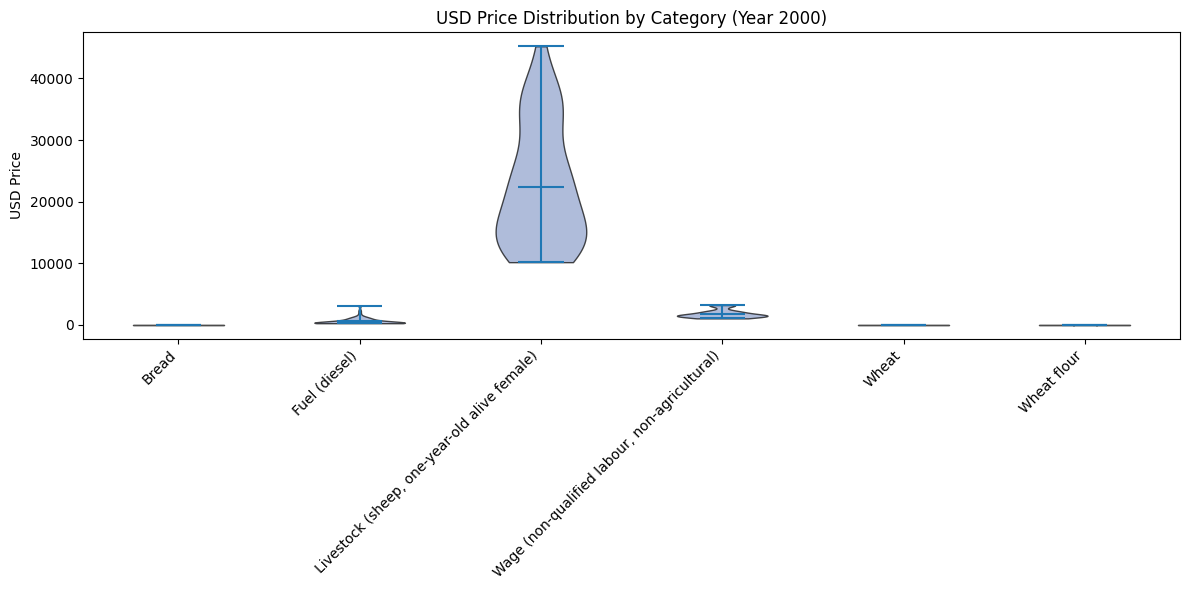

In [13]:
# Violin plot, one per category for year == 2000 using usdprice
df2000 = data[data['year'] == 2000].copy()
categories = sorted(df2000['commodity'].unique())

data_to_plot = [df2000[df2000['commodity'] == c]['usdprice'].dropna() for c in categories]

fig, ax = plt.subplots(figsize=(12, 6))
parts = ax.violinplot(data_to_plot, showmeans=True)

# style violins
for pc in parts['bodies']:
    pc.set_facecolor('#8da0cb')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

ax.set_xticks(range(1, len(categories) + 1))
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.set_ylabel('USD Price')
ax.set_title('USD Price Distribution by Category (Year 2000)')
plt.tight_layout()
plt.show()


In [18]:
# Una domanda: c'è una data che per la stessa categoria compare più volte?
# Proviamo a scoprirlo.
data.groupby(['date', 'commodity']).size().reset_index(name='counts').query('counts > 1')

,date,commodity,counts
0,2000-01-15,Bread,4
1,2000-01-15,"Wage (non-qualified labour, non-agricultural)",6
2,2000-01-15,Wheat,4
3,2000-01-15,Wheat flour,4
4,2000-02-15,Bread,2
...,...,...,...
2069,2024-12-15,"Wage (non-qualified labour, non-agricultural)",34
2070,2024-12-15,Wage (qualified labour),34
2071,2024-12-15,Wheat,32
2072,2024-12-15,Wheat flour (high quality),34


In [23]:
data.loc[data['date'] == '2000-01-15'][data['commodity'] == 'Bread']

C:\Users\HEW14SDQ1006NL\AppData\Local\Temp\ipykernel_16528\2496618105.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.loc[data['date'] == '2000-01-15'][data['commodity'] == 'Bread']


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice,year,year-bin
2,2000-01-15,Hirat,Hirat,Hirat,270,34.35,62.20,cereals and tubers,Bread,55,KG,actual,Retail,AFN,15.63,0.33,2000,2000
6,2000-01-15,Kabul,Kabul,Kabul,271,34.52,69.18,cereals and tubers,Bread,55,KG,actual,Retail,AFN,14.26,0.30,2000,2000
10,2000-01-15,Kandahar,Kandahar,Kandahar,272,31.61,65.71,cereals and tubers,Bread,55,KG,actual,Retail,AFN,16.25,0.35,2000,2000
14,2000-01-15,Nangarhar,Jalalabad,Jalalabad,273,34.43,70.45,cereals and tubers,Bread,55,KG,actual,Retail,AFN,14.86,0.32,2000,2000


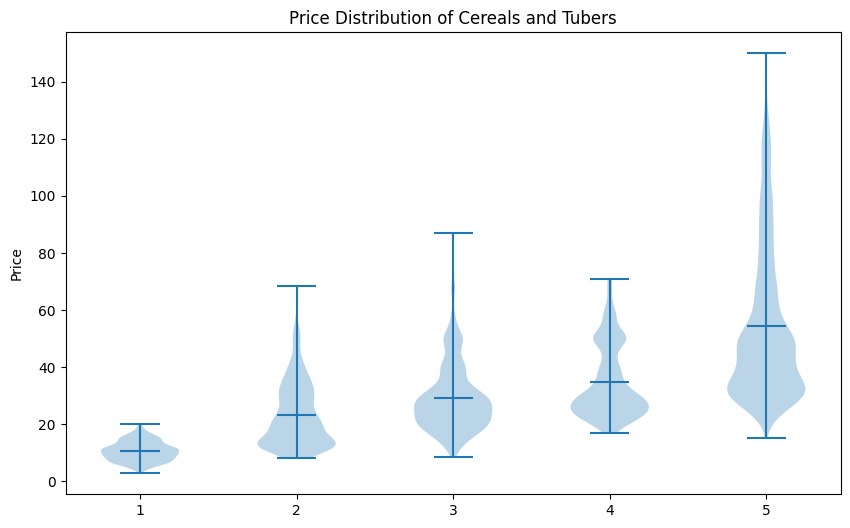

In [41]:
# Violin Plot of Price Distribution with category == "cereals and tubers" for each 5 years with matplotlib
cereals_data = data[data['category'] == 'cereals and tubers']
plt.figure(figsize=(10, 6))
plt.violinplot([group['price'].dropna() for name, group in cereals_data.groupby(cereals_data['year'] // 5 * 5)], showmeans=True)
plt.ylabel('Price')
plt.title('Price Distribution of Cereals and Tubers')
plt.show()

<Axes: xlabel='category'>

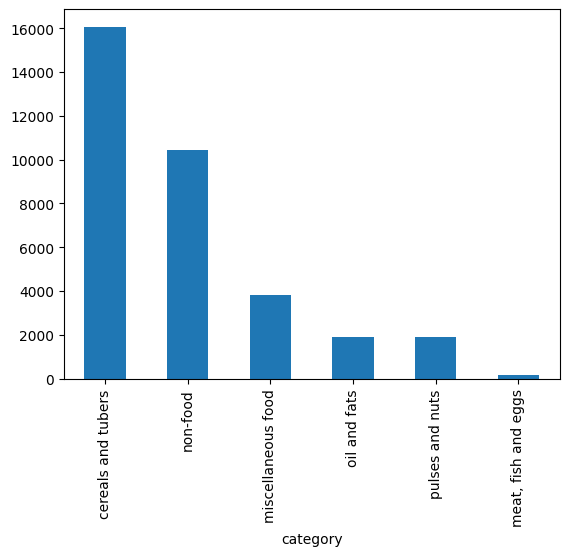

In [42]:
data['category'].value_counts().plot(kind='bar')

In [43]:
data[data['category'] == 'non-food']['commodity'].value_counts()

commodity
Fuel (diesel)                                    2834
Wage (non-qualified labour, non-agricultural)    2684
Wage (qualified labour)                          2472
Exchange rate                                    2440
Name: count, dtype: int64

In [51]:
# many small bar plots, one for each category. I therefore need 6 subplots, 3 rows and 2 columns
"""

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))
axs = axs.flatten()
for i, category in enumerate(data['category'].unique()):
    data[data['category'] == category]['commodity'].value_counts().plot(kind='bar', ax=axs[i], title=category)
plt.tight_layout()
plt.show()

"""

"\n\nfig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))\naxs = axs.flatten()\nfor i, category in enumerate(data['category'].unique()):\n    data[data['category'] == category]['commodity'].value_counts().plot(kind='bar', ax=axs[i], title=category)\nplt.tight_layout()\nplt.show()\n\n"

In [60]:
# Ora vorrei fare un violin plot sempre per 5 anni ma in cui ogni violino è diviso in 2: a sx 'Wage (non-qualified labour, non-agricultural)' e a dx 'Wage (qualified labour)'
wage_data = data[data['category'] == 'non-food'] 
wage_data = wage_data[wage_data['commodity'].isin(['Wage (non-qualified labour, non-agricultural)', 'Wage (qualified labour)'])]
wage_data['commodity'].groupby(wage_data['year-bin']).value_counts()

year-bin  commodity                                    
2000      Wage (non-qualified labour, non-agricultural)     212
2010      Wage (non-qualified labour, non-agricultural)      56
          Wage (qualified labour)                            56
2015      Wage (non-qualified labour, non-agricultural)     480
          Wage (qualified labour)                           480
2020      Wage (non-qualified labour, non-agricultural)    1936
          Wage (qualified labour)                          1936
Name: count, dtype: int64

In [75]:
data[data['year-bin']==2005]['category'].value_counts()
#data[data[data['year-bin']==2025]['category'] == 'non-food']['commodity'].value_counts().sort_index()

category
cereals and tubers    1211
Name: count, dtype: int64

In [57]:
import seaborn as sns

In [76]:
# 2020 wages
wage_data_recent = wage_data[wage_data['year'] >= 2010]

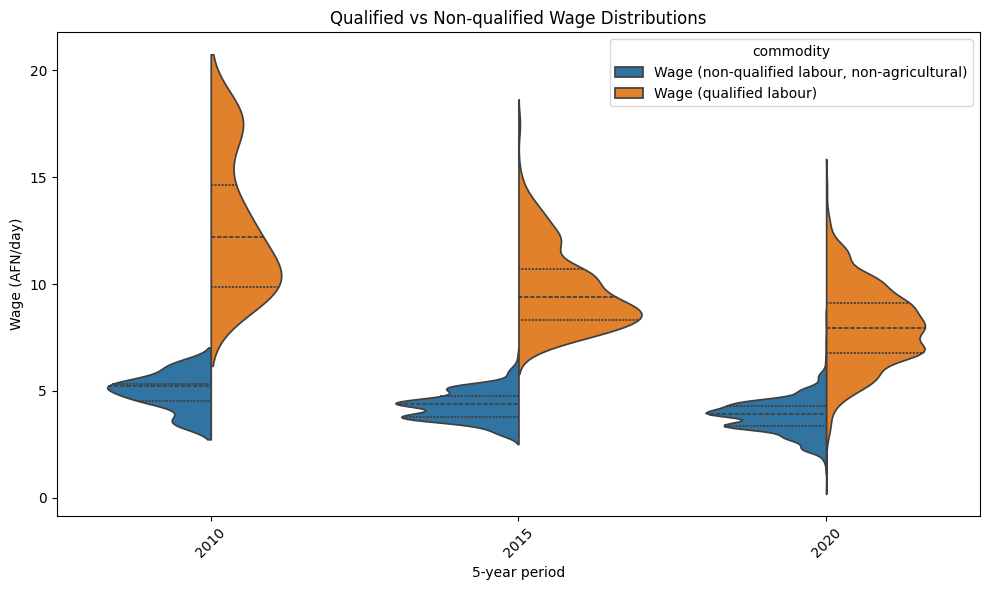

In [79]:
# Raggruppa per fascia e commodity

plt.figure(figsize=(10,6))
sns.violinplot(
    data=wage_data_recent,
    x='year-bin',
    y='usdprice',
    hue='commodity',
    split=True,      # <--- magico: crea il “bipartito”
    inner='quart',   # mostra quartili
    palette=['#1f77b4', '#ff7f0e']
)

plt.xlabel("5-year period")
plt.ylabel("Wage (AFN/day)")
plt.title("Qualified vs Non-qualified Wage Distributions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



AttributeError: 'DataFrame' object has no attribute 'get_group'

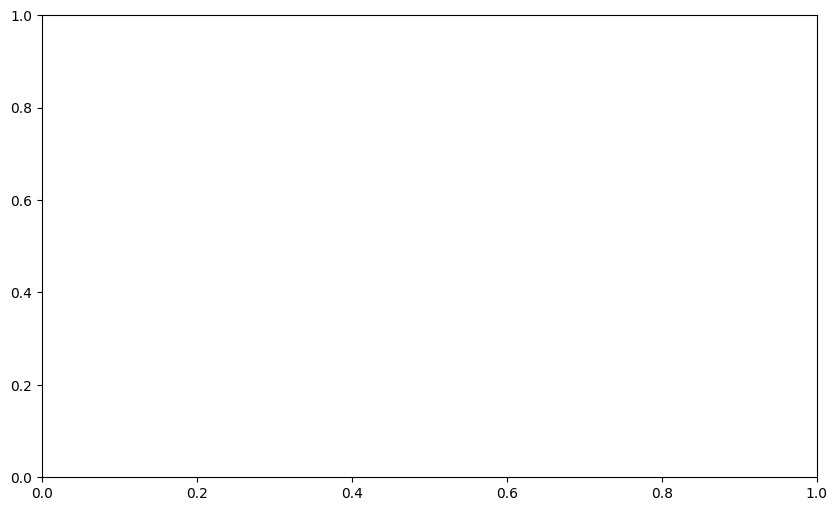

In [78]:
fig, ax = plt.subplots(figsize=(10,6))

for i, y in enumerate(year_bins):
    data_nonq = grouped.get_group((y, 'Wage (non-qualified labour, non-agricultural)')).values
    data_q = grouped.get_group((y, 'Wage (qualified labour)')).values

    # Violin di sinistra (non-qualified)
    parts1 = ax.violinplot([data_nonq], positions=[positions[i] - offset],
                           widths=0.25, showmeans=False, showextrema=False)
    for pc in parts1['bodies']:
        pc.set_facecolor('#1f77b4')
        pc.set_alpha(0.6)

    # Violin di destra (qualified)
    parts2 = ax.violinplot([data_q], positions=[positions[i] + offset],
                           widths=0.25, showmeans=False, showextrema=False)
    for pc in parts2['bodies']:
        pc.set_facecolor('#ff7f0e')
        pc.set_alpha(0.6)

ax.set_xticks(positions)
ax.set_xticklabels([f"{y}-{y+4}" for y in year_bins])
ax.set_xlabel("5-year period")
ax.set_ylabel("Wage (AFN/day)")
ax.set_title("Distribution of Wages by 5-year Period")

ax.legend([pc], ['Non-qualified', 'Qualified'], loc='upper left')  # semplice legenda manuale
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(12, 8))
positions = []
labels = []
data_to_plot = []
for year in sorted(wage_data['year'].unique()):
    for wage_type in ['Wage (non-qualified labour, non-agricultural)', 'Wage (qualified labour)']:
        subset = wage_data[(wage_data['year'] == year) & (wage_data['commodity'] == wage_type)]
        data_to_plot.append(subset['price'].dropna())
        positions.append(year + (0.2 if wage_type == 'Wage (qualified labour)' else -0.2))
        labels.append(f"{year} - {'Qualified' if wage_type == 'Wage (qualified labour)' else 'Non-qualified'}")
plt.violinplot(data_to_plot, positions=positions, showmeans=True)
plt.xticks(ticks=sorted(wage_data['year'].unique()), labels=sorted(wage_data['year'].unique()))
plt.ylabel('Wage Price')
plt.title('Wage Price Distribution by Year and Type')
plt.legend(['Non-qualified Labour', 'Qualified Labour'])
plt.show()